<h1> Data Collection

I gathered the data by web scraping SimplyHired.com.
I used "Data Scientist" as a keyword and searched all Full-Time jobs that have been posted in the past 7 days.
I used a free Google Chrome extension called Web Scraper.
https://chrome.google.com/webstore/detail/web-scraper-free-web-scra/jnhgnonknehpejjnehehllkliplmbmhn?hl=en

I clicked inspect on the site, navigated to the Web Scraper tab, created a SiteMap, and created selectors.
I set up the pagination and ran the tool.
I scraped the job titles, company names, locations, salary, and skills from each job posting.

I exported the data to a csv file.
The resulting file is of about five hundred jobs related to data science and analytics.

In [1]:
import pandas as pd

df = pd.read_csv("dsaData.csv")

In [2]:
df.head()

,job title,company name,location,salary,skills
0,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",Estimated: $86.8K - $110K a year,Health insurance
1,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",Estimated: $86.8K - $110K a year,401(k)
2,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",Estimated: $86.8K - $110K a year,Paid time off
3,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",Estimated: $86.8K - $110K a year,401(k) matching
4,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",Estimated: $86.8K - $110K a year,Microsoft Excel


<h2> Data Cleaning

I noticed that there are many problems with the data collected:

1. There is missing data
2. The salaries are not numerical and have unwanted strings
3. The salaries are not all yearly salaries
4. I need min, max, and average salary columns
5. The skills contain job benefits and educational degrees
6. I want the skills separated into technical, soft, and business skills
7. The location is not separated into city and state
8. The job titles are not simplified
9. The skills are on separate rows and the jobs are duplicated

In the following code I am dealing with those issues.

In [3]:
df.isnull().sum()

job title         0
company name      0
location          0
salary          329
skills            0
dtype: int64

#### Drop missing data

In [4]:
df.shape[0]

3494

In [5]:
df = df.dropna()

In [6]:
df.shape[0]

3165

### The salaries are not numerical and have unwanted strings

<h4> Remove 'Estimated:'

In [7]:
df['salary'] = df['salary'].apply(lambda x: x.replace('Estimated: ', ''))

<h4> Remove '$' and replace 'K' with ',000'

In [8]:
df['salary'] = df['salary'].apply(lambda x: x.replace('$', '').replace('K', ',000'))

<h4> Remove decimals

In [9]:
df['salary'] = df['salary'].apply(lambda x: x.replace('.1', '').replace('.2', '').replace('.3', '').replace('.4', '').replace('.5', '').replace('.6', '').replace('.7', '').replace('.8', '').replace('.9', ''))

In [10]:
df['salary']

0       86,000 - 110,000 a year
1       86,000 - 110,000 a year
2       86,000 - 110,000 a year
3       86,000 - 110,000 a year
4       86,000 - 110,000 a year
                 ...           
3469    79,776 - 182,106 a year
3470    79,776 - 182,106 a year
3471    79,776 - 182,106 a year
3472    79,776 - 182,106 a year
3473    79,776 - 182,106 a year
Name: salary, Length: 3165, dtype: object

### The salaries are not all yearly salaries

<h4> Remove hourly salaries 

In [11]:
df = df[df["salary"].str.contains("an hour")== False]

<h4> Remove 'a year'

In [12]:
df['salary'] = df['salary'].apply(lambda x: x.replace(' a year', ''))

In [13]:
df=df.reset_index(drop=True)

<h4> Remove salaries that are not a range

In [14]:
df.shape[0]

2892

In [15]:
df = df.drop(df[df['salary'].str.contains('-')==False].index)

In [16]:
df.shape[0]

2793

### I need min, max, and average salary columns

<h4> Create a column for minimum salary

In [17]:
df['min salary'] = df['salary'].apply(lambda x: x.split(' - ')[0])

<h4> Create a column for maximum salary

In [18]:
df['max salary'] = df['salary'].apply(lambda x: x.split(' - ')[1])

<h4> Remove commas from min and max salary

In [19]:
df['min salary'] = df['min salary'].apply(lambda x: x.replace(',', ''))

In [20]:
df['max salary'] = df['max salary'].apply(lambda x: x.replace(',', ''))

<h4> Convert salary columns to integer

In [21]:
df[['min salary', 'max salary']] = df[['min salary', 'max salary']].apply(pd.to_numeric)

<h4> Create a column for average salary

In [22]:
df['avg salary'] = (df['min salary']+df['max salary'])/2

<h4> Drop old salary column

In [23]:
df=df.drop(['salary'], axis=1)

In [24]:
df

,job title,company name,location,skills,min salary,max salary,avg salary
0,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",Health insurance,86000,110000,98000.0
1,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",401(k),86000,110000,98000.0
2,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",Paid time off,86000,110000,98000.0
3,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",401(k) matching,86000,110000,98000.0
4,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",Microsoft Excel,86000,110000,98000.0
...,...,...,...,...,...,...,...
2887,Data Scientist,"Asset Marketing Services, LLC","Eagan, MN",Metadata,79776,182106,130941.0
2888,Data Scientist,"Asset Marketing Services, LLC","Eagan, MN",SSIS,79776,182106,130941.0
2889,Data Scientist,"Asset Marketing Services, LLC","Eagan, MN",4 years,79776,182106,130941.0
2890,Data Scientist,"Asset Marketing Services, LLC","Eagan, MN",Communication skills,79776,182106,130941.0


In [25]:
df = df[df["job title"].str.contains("Associate Scientist Data Review")== False]

In [26]:
df = df[df["job title"].str.contains("Cell and Molecular Biology")== False]

In [27]:
df = df[df["job title"].str.contains("Biochemistry Scientist")== False]

<h3> The skills contain job benefits and educational degrees

#### Remove job benefits

In [28]:
df = df[df["skills"].str.contains("Health insurance|401|Paid time off|year|years|Wellness program|Dental insurance|Tuition reimbursement|Vision insurance|Life insurance|Disability insurance|Retirement plan|Health savings account|insurance|Employee assistance program|Opportunities for advancement|Work from home|Parental leave|Flexible schedule|Caregiver leave|Employee stock purchase plan|Family leave|Paid holidays|Flexible spending account|Relocation assistance|Secret Clearance|Referral program|Professional development assistance|Adoption assistance|Unlimited paid time off|Training & development|No experience needed|Paid sick time|Caregiver leave|Employee discount|Prescription drug insurance|Visa sponsorship|Loan forgiveness|403|Top Secret Clearance|Employee stock ownership plan|Commuter assistance") == False]

<h4> Move degrees to new column

In [29]:
degrees=df["skills"].str.contains("Doctor of Philosophy|degree|Bachelor|Master|High school")

In [30]:
df['education']=df["skills"].where(degrees,'')

In [31]:
df["skills"]=df["skills"].mask(degrees,'')

### I want the skills separated into technical, soft, and business skills

<h4> Move soft skills to new column

In [32]:
soft=df["skills"].str.contains("Communication skills|Customer service|Time management|Research|Organizational skills|Leadership|Presentation skills")

In [33]:
df['soft skills']=df["skills"].where(soft,'')

In [34]:
df["skills"]=df["skills"].mask(soft,'')

<h4> Move business skills to new column

In [35]:
business=df["skills"].str.contains("Management|Lean|AWS|Six Sigma|Azure|Google Cloud Platform|Product management|CI/CD|Jira|Program management|Kanban|Smartsheet|Agile|Confluence|Waterfall|Google Cloud Platform")

In [36]:
df['business skills']=df["skills"].where(business,'')

In [37]:
df["skills"]=df["skills"].mask(business,'')

<h4> Move technical skills to new column

In [38]:
technical=df["skills"].str.contains("Excel|Computer Science|NumPy|SQL|Pandas|Analysis|Machine learning|Scripting|Regression analysis|Python|Analytics|Microsoft Office|Data collection|AI|Statistical software|MATLAB|SAS|R|Java|C|Data modeling|Business intelligence|Tableau|PostgreSQL|ETL|Predictive analytics|PowerShell|Data mining|Big data|NoSQL|Software development|Unit testing|TensorFlow|Statistics|PyTorch|Computer vision|Deep learning|Linux|Natural language processing|Microsoft Powerpoint|Microsoft Word|Quantitative analysis|Writing skills|Debugging|XML|PyTorch|UNIX|SPARQL|Data visualization|Power BI|Git|OOP|Data science|MySQL|Scala|JSON|C#|Calculus|Mathematics|Math|Application development|D3.js|QlikView|Spark|Hadoop|SPSS|APIs|Signal processing|React|Cleaning|Power Pivot|MongoDB|SciPy|Robotics|Cloud computing|Go|Database management|Data warehouse|Economics|DevOps|Data lake|Databases|Data analysis skills|Data structures|Database management|Software development|Relational databases|Java|Clustering|JavaScript|Applied Mathematics|Flask|Forecasting|Full-stack development|Visual Studio|Business Information Systems|MapReduce|Microsoft Access|Microsoft Outlook|Accounting|Data management|Stata|Simulink|Marketing|E-commerce|Julia|Cloud architecture|SSIS|Pricing|Forecasting|Kotlin|Confluence|Algebra|Oracle|Apache Hive|Apache Pig|Kubernetes|OpenStack|S3|GitLab|Django|Teradata|Docker|Alteryx|GitHub")

In [39]:
df['technical skills']=df["skills"].where(technical,'')

In [40]:
df["skills"]=df["skills"].mask(technical,'')

<h4> Drop old skills column

In [41]:
df=df.drop(['skills'], axis=1)

In [42]:
df=df.reset_index(drop=True)

In [43]:
df

,job title,company name,location,min salary,max salary,avg salary,education,soft skills,business skills,technical skills
0,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",86000,110000,98000.0,,,,Microsoft Excel
1,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",86000,110000,98000.0,,,Management,
2,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",86000,110000,98000.0,,,,Computer Science
3,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",86000,110000,98000.0,,,,NumPy
4,Data Scientist Senior Associate,Home Partners of America Inc,"Chicago, IL",86000,110000,98000.0,Master's degree,,,
...,...,...,...,...,...,...,...,...,...,...
2107,Data Scientist,"Asset Marketing Services, LLC","Eagan, MN",79776,182106,130941.0,,,,Data collection
2108,Data Scientist,"Asset Marketing Services, LLC","Eagan, MN",79776,182106,130941.0,,,,
2109,Data Scientist,"Asset Marketing Services, LLC","Eagan, MN",79776,182106,130941.0,,,,SSIS
2110,Data Scientist,"Asset Marketing Services, LLC","Eagan, MN",79776,182106,130941.0,,Communication skills,,


### The location is not separated into city and state

#### Separate city and state

In [44]:
df['location'] = df['location'].apply(lambda x: x.replace('Remote', 'Remote, Remote'))

In [45]:
df = df.drop(df[df['location'].str.contains('United States')==True].index)

In [46]:
df['city'] = df['location'].apply(lambda x: x.split(', ')[0])

In [47]:
df['state'] = df['location'].apply(lambda x: x.split(', ')[1])

In [48]:
pd.set_option("display.max_rows", None)

In [49]:
df['location']

0                    Chicago, IL
1                    Chicago, IL
2                    Chicago, IL
3                    Chicago, IL
4                    Chicago, IL
5                    Chicago, IL
6                    Chicago, IL
7                    Chicago, IL
8                    Chicago, IL
9                    Chicago, IL
10                   Chicago, IL
11                   Chicago, IL
12                   Chicago, IL
13                   Chicago, IL
14                   Chicago, IL
15                  Sterling, VA
16                  Sterling, VA
17                  Sterling, VA
18                  Sterling, VA
19                  Hartford, CT
20                  Hartford, CT
21                  Hartford, CT
22                  Hartford, CT
23                  Hartford, CT
24                  Hartford, CT
25                    Boston, MA
26                    Boston, MA
27                    Boston, MA
28                    Boston, MA
29                    Boston, MA
30        

In [50]:
df=df.drop(['location'], axis=1)

In [51]:
df=df.reset_index(drop=True)

In [52]:
df[['city', 'state']]

,city,state
0,Chicago,IL
1,Chicago,IL
2,Chicago,IL
3,Chicago,IL
4,Chicago,IL
5,Chicago,IL
6,Chicago,IL
7,Chicago,IL
8,Chicago,IL
9,Chicago,IL


### The job titles are not simplified

In [53]:
df2 = df.copy()

In [54]:
print(df2['job title'].value_counts())

Data Scientist                                                                          514
Senior Data Scientist                                                                   106
Senior Data Analyst                                                                      59
Data Scientist II                                                                        54
DATA SCIENTIST                                                                           51
Sr Data Scientist                                                                        42
Manager, Data Science Engineer                                                           42
Financial Data Science, Senior Consultant                                                32
Mid-Level Data Scientist                                                                 30
Fortune 500 Data Architect                                                               29
Data Scientist I                                                                

In [55]:
df2.loc[df2['job title'].str.contains('decision', case=False), 'job title'] = 'Decision Scientist'

In [56]:
df2.loc[df2['job title'].str.contains('marketing', case=False), 'job title'] = 'Marketing Data Scientist'

In [57]:
df2.loc[df2['job title'].str.contains('ai', case=False), 'job title'] = 'Machine Learning Specialist'

In [58]:
df2.loc[df2['job title'].str.contains('artificial intelligence', case=False), 'job title'] = 'Machine Learning Specialist'

In [59]:
df2.loc[df2['job title'].str.contains('ml', case=False), 'job title'] = 'Machine Learning Specialist'

In [60]:
df2.loc[df2['job title'].str.contains('machine learning', case=False), 'job title'] = 'Machine Learning Specialist'

In [61]:
df2.loc[df2['job title'].str.contains('analyst', case=False), 'job title'] = 'Data Analyst'

In [62]:
df2.loc[df2['job title'].str.contains('analytics', case=False), 'job title'] = 'Data Analyst'

In [63]:
df2.loc[df2['job title'].str.contains('data specialist', case=False), 'job title'] = 'Data Specialist'

In [64]:
df2.loc[df2['job title'].str.contains('architect', case=False), 'job title'] = 'Data Architect'

In [65]:
df2.loc[df2['job title'].str.contains('engineer', case=False), 'job title'] = 'Data Engineer'

In [66]:
df2.loc[df2['job title'].str.contains('data engineer', case=False), 'job title'] = 'Data Engineer'

In [67]:
df2.loc[df2['job title'].str.contains('data scientist', case=False), 'job title'] = 'Data Scientist'

In [68]:
df2.loc[df2['job title'].str.contains('data science', case=False), 'job title'] = 'Data Scientist'

In [69]:
df2.loc[df2['job title'].str.contains('data and applications', case=False), 'job title'] = 'Data Scientist'

In [70]:
df2.loc[df2['job title'].str.contains('data specialist', case=False), 'job title'] = 'Data Scientist'

In [72]:
df2 = df2.drop(df2[df2['job title'].str.contains('Sr. NLP Researcher|Senior Applied Scientist|Sr.|Configuration|Senior')==True].index)

In [73]:
print(df2['job title'].value_counts())

Data Scientist                 1523
Machine Learning Specialist     223
Data Analyst                    183
Data Engineer                    73
Data Architect                   29
Decision Scientist               14
Name: job title, dtype: int64


In [74]:
df2=df2.reset_index(drop=True)

In [75]:
df2

,job title,company name,min salary,max salary,avg salary,education,soft skills,business skills,technical skills,city,state
0,Data Scientist,Home Partners of America Inc,86000,110000,98000.0,,,,Microsoft Excel,Chicago,IL
1,Data Scientist,Home Partners of America Inc,86000,110000,98000.0,,,Management,,Chicago,IL
2,Data Scientist,Home Partners of America Inc,86000,110000,98000.0,,,,Computer Science,Chicago,IL
3,Data Scientist,Home Partners of America Inc,86000,110000,98000.0,,,,NumPy,Chicago,IL
4,Data Scientist,Home Partners of America Inc,86000,110000,98000.0,Master's degree,,,,Chicago,IL
5,Data Scientist,Home Partners of America Inc,86000,110000,98000.0,,,,SQL,Chicago,IL
6,Data Scientist,Home Partners of America Inc,86000,110000,98000.0,,,,Pandas,Chicago,IL
7,Data Scientist,Home Partners of America Inc,86000,110000,98000.0,,,,Analysis skills,Chicago,IL
8,Data Scientist,Home Partners of America Inc,86000,110000,98000.0,Bachelor's degree,,,,Chicago,IL
9,Data Scientist,Home Partners of America Inc,86000,110000,98000.0,,,,Machine learning,Chicago,IL


In [76]:
df=df2.copy()

### The skills are on separate rows and the jobs are duplicated

#### Reorganize technical, soft, and business skills into lists

In [78]:
grouped = df.groupby(['job title', 'company name', 'avg salary', 'city', 'state']).agg({'education': lambda x: list(x), 'technical skills': lambda x: list(x), 'soft skills': lambda x: list(x), 'business skills': lambda x: list(x)}).reset_index()

In [79]:
grouped

,job title,company name,avg salary,city,state,education,technical skills,soft skills,business skills
0,Data Analyst,7-Eleven (Corporate Stores),80000.0,Irving,TX,"[, , , , , , , , , , ]","[Power BI, , Microsoft Office, , , , Analysis ...","[, , , , , , , Organizational skills, , , ]","[, , , , , , , , , , ]"
1,Data Analyst,Burger King,62500.0,South Ogden,UT,"[, , , , , , , Bachelor's degree, , , ]","[Microsoft Powerpoint, Microsoft Word, Power B...","[, , , , , , , , , , ]","[, , , , , , , , , , ]"
2,Data Analyst,COOP by Ryder,87500.0,Remote,Remote,"[, , , , , Master's degree, , , Bachelor's deg...","[Power BI, R, Google Tag Manager, , Tableau, ,...","[, , , , , , , , , , , , , Leadership, , ]","[, , , Google Cloud Platform, , , , , , , , , ..."
3,Data Analyst,CarePoint Health,105000.0,Denver,CO,"[, , , , , , , , Master's degree, , , , Bachel...","[Power BI, Data modeling, , Business intellige...","[, , , , , , , , , , , , , , , , Communication...","[, , Azure, , , , Google Cloud Platform, , , ,..."
4,Data Analyst,Creative Financial Staffing,85000.0,Edgerton,OH,"[, , Bachelor of Science, , , , Bachelor's deg...","[Microsoft Excel, Microsoft Access, , Data ana...","[, , , , , , , ]","[, , , , , , , ]"
5,Data Analyst,Etsy,120000.0,Brooklyn,NY,"[, , , , , , , ]","[R, , E-commerce, SQL, Analysis skills, Script...","[, , , , , , , ]","[, , , , , , , ]"
6,Data Analyst,Fresenius Kabi,90000.0,Lake Zurich,IL,"[, , , , , Bachelor's degree, , , , , , , Bach...","[, Data structures, Microsoft Office, Database...","[, , , , , , , , , , , , , ]","[, , , , , , , , , , , , , ]"
7,Data Analyst,General Dynamics,103500.0,Atlanta,GA,"[, , , , , Bachelor of Science, , , , , , Mast...","[Microsoft Powerpoint, Power BI, Microsoft Exc...","[, , , , , , , , , , , , , , , , , , , , , Com...","[, , , , , , , , , , , , , , , , , , , , , , , ]"
8,Data Analyst,General Dynamics Information Technology,85000.0,Remote,Remote,"[, , , , , Bachelor's degree, , , ]","[Power BI, Economics, SAS, Mathematics, SQL, ,...","[, , , , , , , , Communication skills]","[, , , , , , , , ]"
9,Data Analyst,Healthcare Association of New York State,82500.0,Rensselaer,NY,"[, ]","[SQL, Power Pivot]","[, ]","[, ]"


#### Remove extra commas in the lists

In [80]:
grouped[['education', 'technical skills', 'soft skills', 'business skills']] = grouped[['education', 'technical skills', 'soft skills', 'business skills']].applymap(lambda x: [i.strip() for i in x if i.strip()])


In [81]:
grouped

,job title,company name,avg salary,city,state,education,technical skills,soft skills,business skills
0,Data Analyst,7-Eleven (Corporate Stores),80000.0,Irving,TX,[],"[Power BI, Microsoft Office, Analysis skills, ...",[Organizational skills],[]
1,Data Analyst,Burger King,62500.0,South Ogden,UT,[Bachelor's degree],"[Microsoft Powerpoint, Microsoft Word, Power B...",[],[]
2,Data Analyst,COOP by Ryder,87500.0,Remote,Remote,"[Master's degree, Bachelor's degree, Master of...","[Power BI, R, Google Tag Manager, Tableau, SQL...",[Leadership],[Google Cloud Platform]
3,Data Analyst,CarePoint Health,105000.0,Denver,CO,"[Master's degree, Bachelor's degree]","[Power BI, Data modeling, Business intelligenc...",[Communication skills],"[Azure, Google Cloud Platform, AWS]"
4,Data Analyst,Creative Financial Staffing,85000.0,Edgerton,OH,"[Bachelor of Science, Bachelor's degree]","[Microsoft Excel, Microsoft Access, Data analy...",[],[]
5,Data Analyst,Etsy,120000.0,Brooklyn,NY,[],"[R, E-commerce, SQL, Analysis skills, Scriptin...",[],[]
6,Data Analyst,Fresenius Kabi,90000.0,Lake Zurich,IL,"[Bachelor's degree, Bachelor's degree]","[Data structures, Microsoft Office, Databases,...",[],[]
7,Data Analyst,General Dynamics,103500.0,Atlanta,GA,"[Bachelor of Science, Master's degree, Bachelo...","[Microsoft Powerpoint, Power BI, Microsoft Exc...",[Communication skills],[]
8,Data Analyst,General Dynamics Information Technology,85000.0,Remote,Remote,[Bachelor's degree],"[Power BI, Economics, SAS, Mathematics, SQL, D...",[Communication skills],[]
9,Data Analyst,Healthcare Association of New York State,82500.0,Rensselaer,NY,[],"[SQL, Power Pivot]",[],[]


## Data Analysis

### Average salaries by state

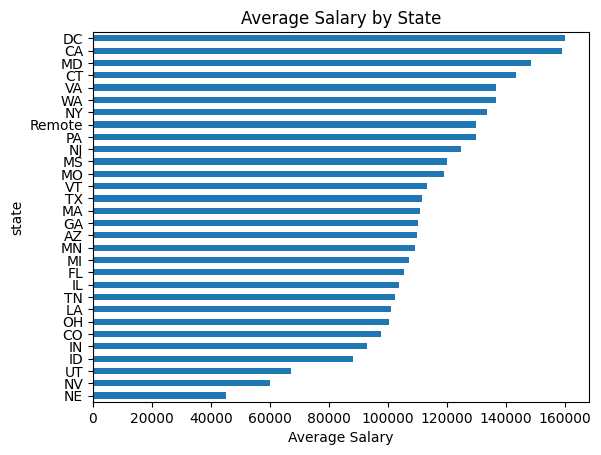

In [82]:
import matplotlib.pyplot as plt

# Display basic statistics
grouped.describe()

# Plot the average salary by state
grouped.groupby('state')['avg salary'].mean().sort_values().plot(kind='barh')
plt.xlabel('Average Salary')
plt.title('Average Salary by State')

# Show the plot
plt.show()

### Top 10 technical skills

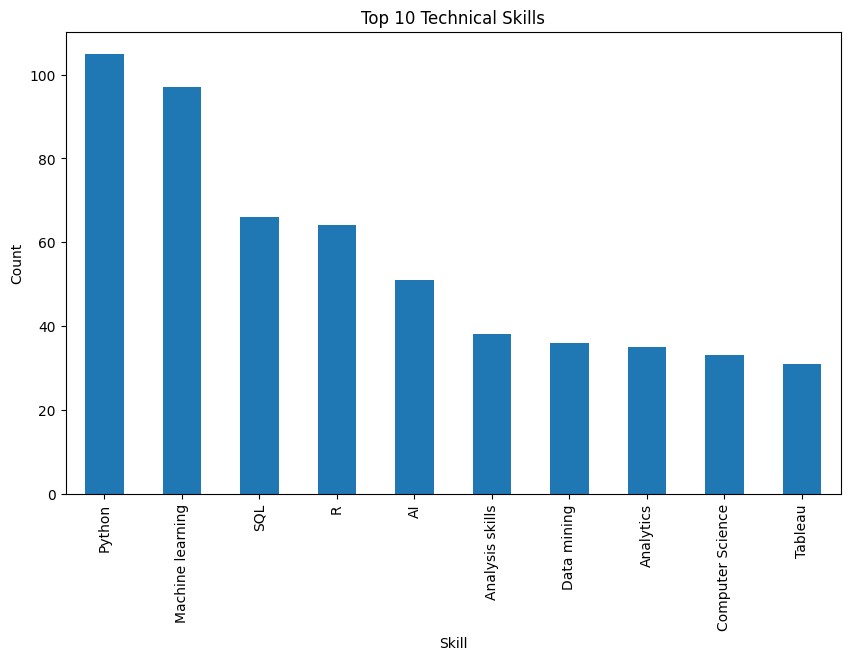

In [83]:
def plot_skills(skills, title):
    all_skills = [i.strip() for j in grouped[skills] for i in j if isinstance(i, str) and i.strip()]
    top_skills = pd.Series(all_skills).value_counts().head(10)
    ax = top_skills.plot(kind='bar', figsize=(10, 6), title=title)
    ax.set_xlabel('Skill')
    ax.set_ylabel('Count')

plot_skills('technical skills', 'Top 10 Technical Skills')
plt.show()

### Top 10 soft skills

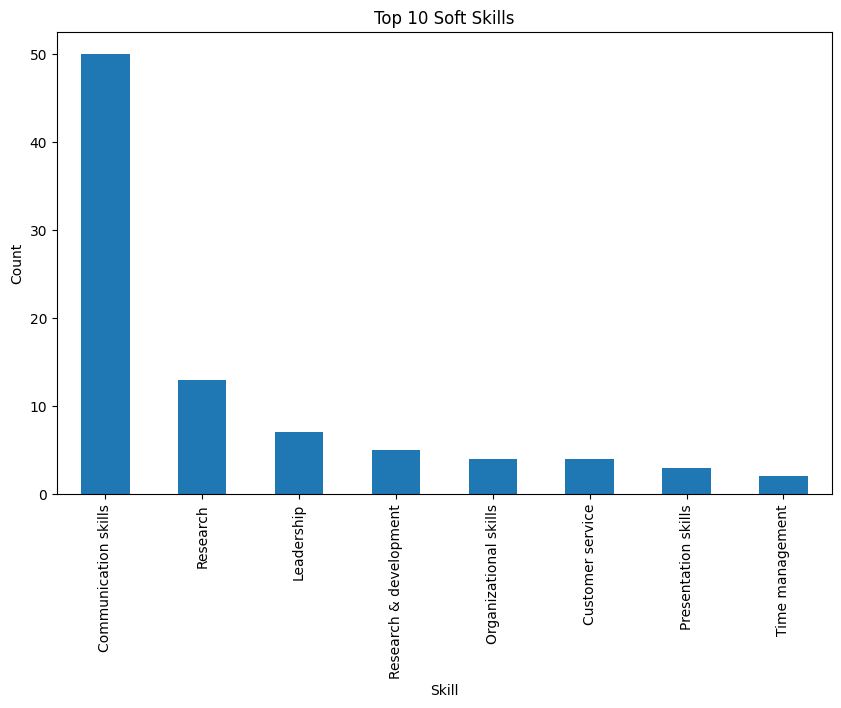

In [85]:
# Plot the top 10 most common soft skills
plot_skills('soft skills', 'Top 10 Soft Skills')
plt.show()

### Top 10 business skills

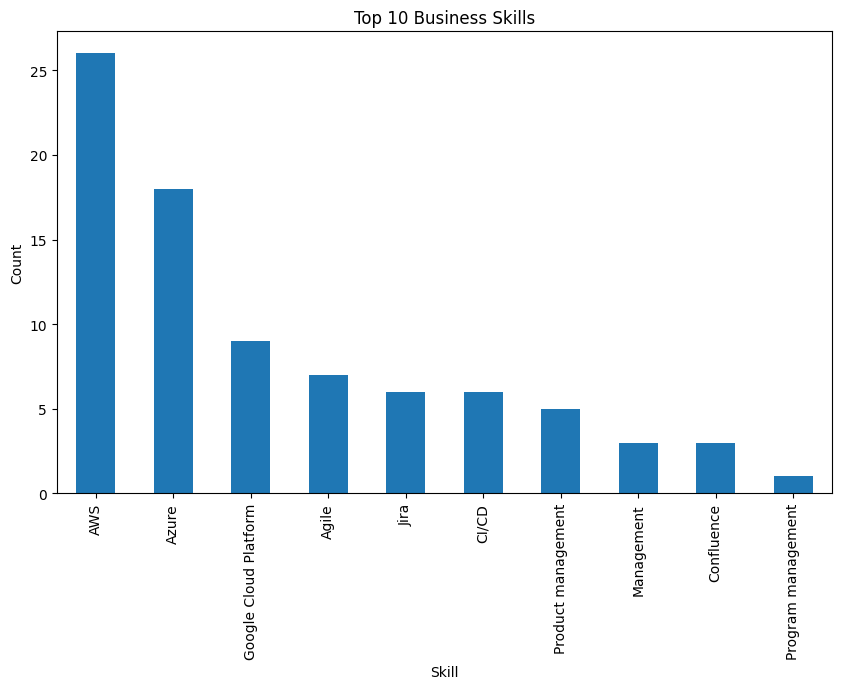

In [86]:
# Plot the top 10 most common soft skills
plot_skills('business skills', 'Top 10 Business Skills')
plt.show()

### Most common technical skills by job title

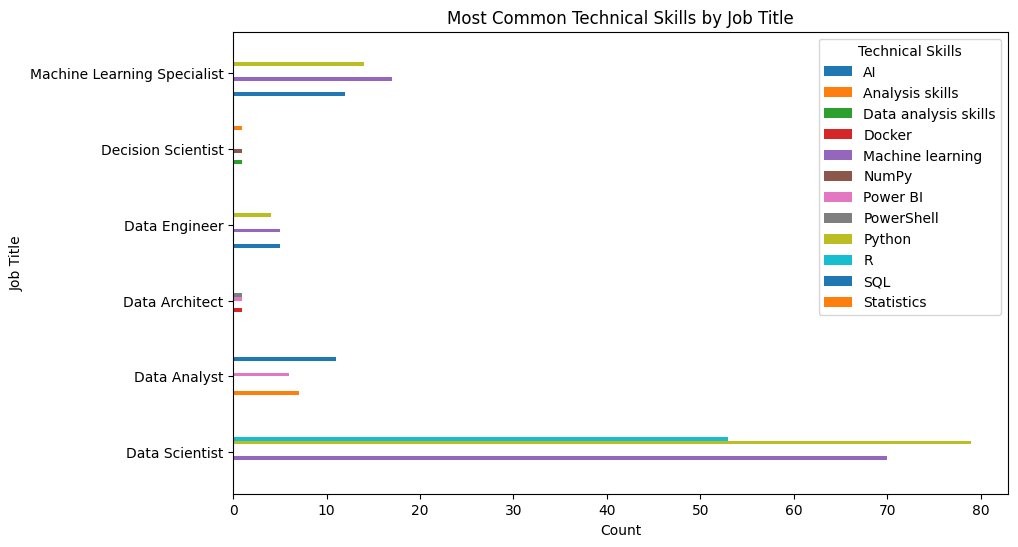

In [87]:
# Get the most common technical skills for each job title
skills_by_title = grouped.groupby('job title')['technical skills'].apply(lambda x: pd.Series([i.strip() for j in x for i in j if i.strip()]).value_counts().head(3)).unstack().fillna(0)

# Rearrange the rows of the DataFrame so that 'Data Scientist' appears first
skills_by_title = skills_by_title.reindex(['Data Scientist'] + skills_by_title.index.difference(['Data Scientist']).tolist())

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
skills_by_title.plot(kind='barh', ax=ax, width=0.6)
ax.set_xlabel('Count')
ax.set_ylabel('Job Title')
ax.set_title('Most Common Technical Skills by Job Title')
ax.legend(title='Technical Skills')

# Show the plot
plt.show()


### Top 25 companies by average salary

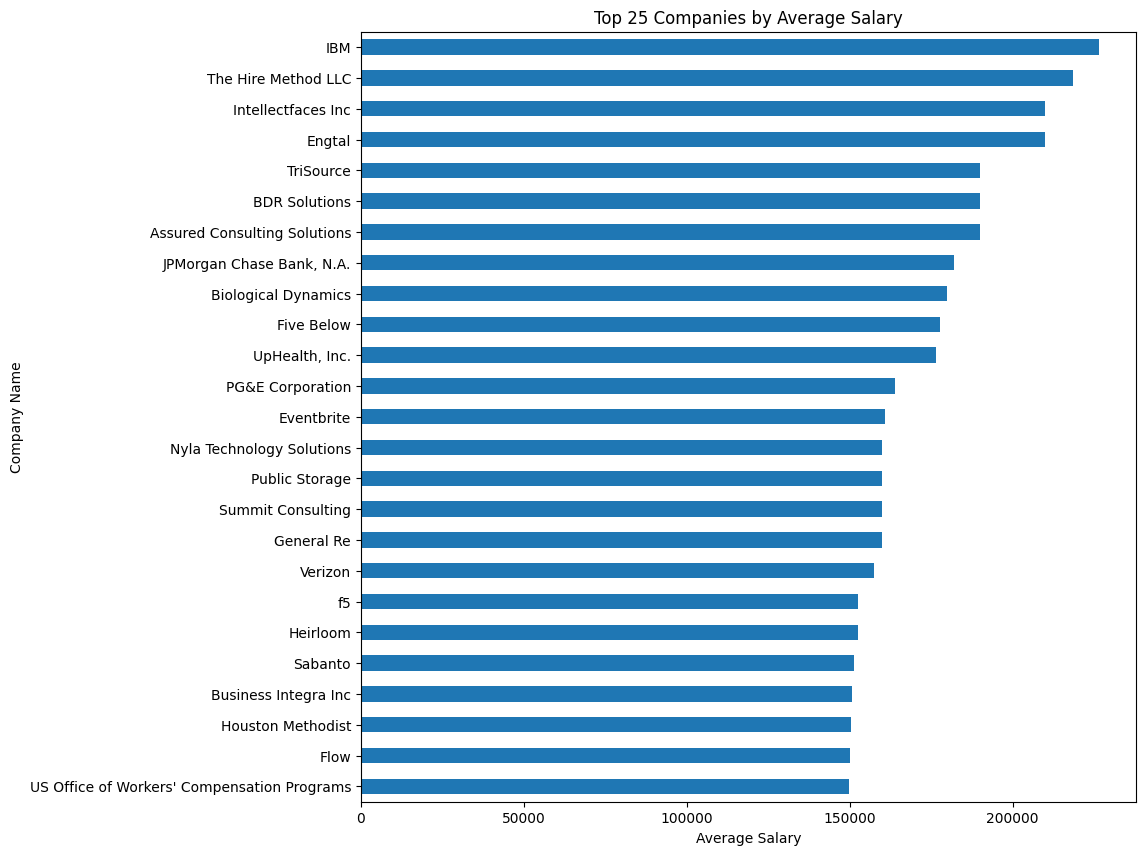

In [88]:
# Group the data by company name and calculate the mean salary
salary_by_company = grouped.groupby('company name')['avg salary'].mean().sort_values(ascending=False)[:25]

# Plot the data horizontally
fig, ax = plt.subplots(figsize=(10, 10))
salary_by_company.plot(kind='barh', ax=ax)
ax.set_xlabel('Average Salary')
ax.set_ylabel('Company Name')
ax.set_title('Top 25 Companies by Average Salary')
plt.gca().invert_yaxis() # invert y-axis to show highest salary at the top

# Show the plot
plt.show()

TO DO:

replicate plot for soft and business skills

top 5 skills for each job title grouped (technical... etc.)

drop senior positions (make their own group) and compare skills